In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os

import folium

###### fetch our dataset

In [2]:
#set source directory.
#not possible to pull data files directly from Https as files are zipped.
os.chdir("C:\\Users\\jringros\\Documents\\Data_sets")
os.getcwd()

'C:\\Users\\jringros\\Documents\\Data_sets'

In [3]:
#import our data into a pandas dataframe
Berlin_raw=pd.read_csv('Berlin_AiRBNB.csv')
Berlin_raw.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,2.021020e+13,21/02/2021,Berlin-Mitte Value! Quiet courtyard/very central,Great location! <br />30 of 75 sq meters. Thi...,It is located in the former East Berlin area o...,https://a0.muscache.com/pictures/260fd609-710a...,2217,https://www.airbnb.com/users/show/2217,...,10.0,10.0,9.0,NaN,f,6,6,0,0,2.26
1,3176,https://www.airbnb.com/rooms/3176,2.021020e+13,21/02/2021,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,...,9.0,10.0,9.0,NaN,f,1,1,0,0,1.03
2,3309,https://www.airbnb.com/rooms/3309,2.021020e+13,21/02/2021,BerlinSpot Schöneberg near KaDeWe,First of all:<br />I prefer short-notice booki...,"My flat is in the middle of West-Berlin, direc...",https://a0.muscache.com/pictures/29054294/b1fa...,4108,https://www.airbnb.com/users/show/4108,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.29
3,6883,https://www.airbnb.com/rooms/6883,2.021020e+13,21/02/2021,Stylish East Side Loft in Center with AC & 2 b...,This apartment is available for people working...,The emerging and upcoming East of the new hip ...,https://a0.muscache.com/pictures/06b77d9b-4843...,16149,https://www.airbnb.com/users/show/16149,...,10.0,10.0,10.0,02/Z/RA/008250-18,f,1,1,0,0,1.01
4,7071,https://www.airbnb.com/rooms/7071,2.021020e+13,21/02/2021,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",https://a0.muscache.com/pictures/21278/32a1622...,17391,https://www.airbnb.com/users/show/17391,...,10.0,10.0,9.0,NaN,t,1,0,1,0,2.09


In [4]:
Berlin_raw.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.997800e+04,1.997800e+04,1.997800e+04,19958.000000,19958.000000,19978.000000,19978.000000,19978.000000,0.0,18279.000000,...,15457.000000,15444.000000,15455.000000,15446.000000,15443.000000,19978.000000,19978.000000,19978.000000,19978.000000,15868.000000
mean,2.427555e+07,2.021020e+13,8.932954e+07,4.021495,4.021495,52.510245,13.404436,2.744319,NaN,1.282291,...,9.326389,9.729021,9.731543,9.607795,9.388914,3.110722,2.084943,0.736310,0.187656,0.688556
std,1.414456e+07,0.000000e+00,1.026728e+08,30.275814,30.275814,0.031918,0.062224,1.650585,NaN,0.781158,...,1.056087,0.744465,0.751822,0.762339,0.909169,7.483653,6.768710,1.434123,2.253423,1.152330
min,2.015000e+03,2.021020e+13,1.581000e+03,0.000000,0.000000,52.340410,13.098390,0.000000,NaN,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.202618e+07,2.021020e+13,1.126167e+07,1.000000,1.000000,52.489870,13.367953,2.000000,NaN,1.000000,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.100000
50%,2.323026e+07,2.021020e+13,4.260587e+07,1.000000,1.000000,52.509895,13.413925,2.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.270000
75%,3.744612e+07,2.021020e+13,1.388391e+08,2.000000,2.000000,52.533030,13.438900,3.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,0.780000
max,4.824268e+07,2.021020e+13,3.892339e+08,1111.000000,1111.000000,52.655980,13.757580,16.000000,NaN,50.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,73.000000,73.000000,16.000000,38.000000,49.130000


#### Data wrangling-part 1

In [5]:
#Price data is a $string convert Price:$string to float.
Berlin_raw['price'] = Berlin_raw['price'].str.replace(',','').str.replace('$','').astype('float')

In [6]:
#remove outliers.
#motivation for this: the analysis wants to look at the average of the data, edge cases in our data set are higly unusual.
#distribution of the data in majority of feilds is not a normal dist, however there are extreme tails at >10sigma in some feilds.

Berlin_data=Berlin_raw[(Berlin_raw['price']<=150)]#above 200 per night is outside 6sigma.
Berlin_data=Berlin_data[(Berlin_raw['price']>=10)]#below $10 per night for accomidation seems unusual this analysis should have commercial value. 
Berlin_data=Berlin_data[(Berlin_raw['minimum_maximum_nights']<=1000)]

C:\Users\jringros\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\jringros\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Text(0.5, 1.0, 'Berlin AirBnB Price distribution')

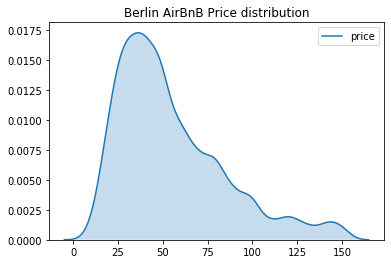

In [7]:
#remove vectors with NAN price attached. Again if there are NAN's I am removing these as I cant attach a commercial 'value' to the related features.
Berlin_data["price"]=Berlin_data["price"].dropna()
#quick sanity check on price data
sns.kdeplot(Berlin_data.price, shade=True, clip=(0, 5000))
plt.title("Berlin AirBnB Price distribution")

Text(0.5, 1.0, 'Berlin AirBnB Price distribution')

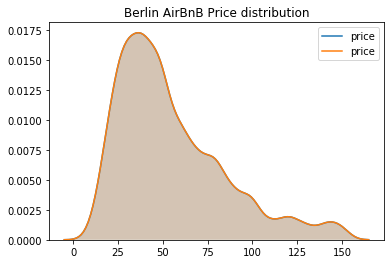

In [8]:
Berlin_data["bedrooms_new"]=Berlin_data["bedrooms"].fillna(1)#make the assumption that the min room possible is 1. fill na in room with 1
Berlin_data=Berlin_data[(Berlin_data['bedrooms_new']<=10)]#&(Berlin_raw['price']>=10)]
Berlin_data=Berlin_data[(Berlin_data['price']>=1)]

Berlin_fill=Berlin_data.interpolate(method='pad', limit=2, limit_direction='forward', axis=0)# interpolate the reviews one way of doing it.
#check for nulls
Berlin_fill.head(2)
###potenitally remove the following.
#debug-interpolate as changed the price distribution.
sns.kdeplot(Berlin_data.price, shade=True, clip=(0, 5000))
plt.title("Berlin AirBnB Price distribution")


sns.kdeplot(Berlin_fill.price, shade=True, clip=(0, 5000))
plt.title("Berlin AirBnB Price distribution")

## 1]  Which areas are most popular?

#### Bar chart of: count by area.

[Text(0, 0.5, 'Berlin borough'), Text(0.5, 0, 'Number of properties')]

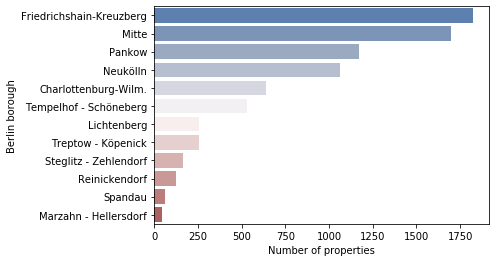

In [9]:
BER_Z = Berlin_fill.groupby('neighbourhood_group_cleansed', as_index=False).price.count()
BER_Z=BER_Z.sort_values(by='price', ascending=False)
ax=sns.barplot(x='price', y='neighbourhood_group_cleansed', data=BER_Z,palette="vlag")
ax.set(xlabel="Number of properties", ylabel = "Berlin borough")

#### Map of area by count.

In [10]:
def generateBaseMap(default_location=[52.49885, 13.34906], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [11]:
from folium.plugins import HeatMap

base_map = generateBaseMap()
HeatMap(data=Berlin_fill[['latitude', 'longitude', 'property_type']].groupby(['latitude', 'longitude']).count().reset_index().values.tolist(), radius=14, max_zoom=10).add_to(base_map)
base_map

In [12]:
#berlin_map = folium.Map(location=[52.49885, 13.34906], zoom_start=11)

belin_boroughs = "https://raw.githubusercontent.com/funkeinteraktiv/Berlin-Geodaten/master/berlin_bezirke.geojson"
#berlin_price = Berlin_fill.groupby('neighbourhood_group_cleansed', as_index=False).Price.count()


folium.Choropleth(
    geo_data=belin_boroughs,
    name='choropleth',
    data=Berlin_data,
    columns=['neighbourhood_group_cleansed', 'price'],
    key_on='feature.properties.name',
    fill_color='RdBu_r',
    fill_opacity=0.1,
    line_opacity=0.5,
    legend = "Mean Average Price (Euro)"
).add_to(base_map)

#folium.LayerControl().add_to(berlin_map)

base_map

## 2]  Which is the most popular accomidation type?

       property_type
other            892
                           property_type
Entire apartment                    3445
Private room in apartment           3183
Entire serviced apartment            205
Entire condominium                   104
other                                892


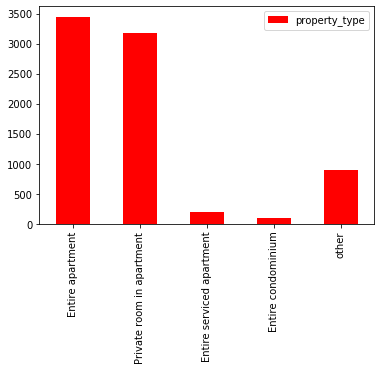

In [13]:
#1st lets find the most popular property type
prop_sum=Berlin_fill.property_type.count()


prop_count=Berlin_fill.property_type.value_counts()
prop=pd.DataFrame(prop_count[prop_count > 100])
main_prop=prop.property_type.sum()

prop_other=prop_sum-main_prop
PO=[prop_other]
prop_other=pd.DataFrame(PO,index=["other"],columns=["property_type"])
print(prop_other)

prop=prop.append(prop_other)
print(prop)
prop.plot.bar(color="red")




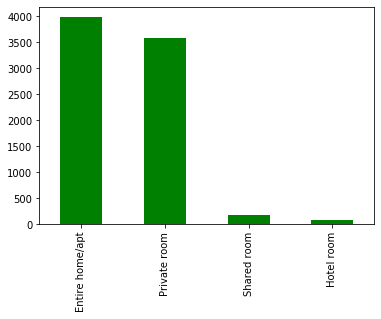

In [14]:
#2nd the most popular room type'

room_count=Berlin_fill.room_type.value_counts()
#room=pd.DataFrame(room_count[room_count > 100])


room_count.plot.bar(color="green")

## 3]  How is the price of accomidation determined by location and accomidaion capacity?

##### Price by location

[Text(0, 0.5, 'Berlin borough'), Text(0.5, 0, 'Mean property price')]

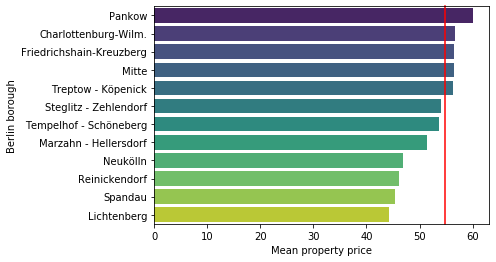

In [15]:
mean_price=Berlin_fill.price.mean()

BER_Z = Berlin_fill.groupby('neighbourhood_group_cleansed', as_index=False).price.mean()
BER_Z=BER_Z.sort_values(by='price', ascending=False)
ax=sns.barplot(x='price', y='neighbourhood_group_cleansed', data=BER_Z,palette="viridis")
ax.axvline(mean_price, color="r", clip_on=False)
ax.set(xlabel="Mean rental price", ylabel = "Berlin borough")

##### price by accomidates.

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Number of inidividuals accommodated')]

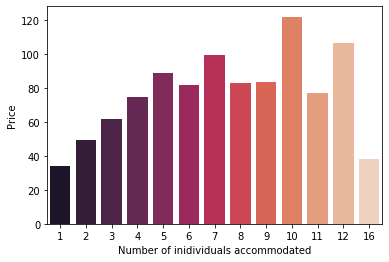

In [16]:
#accommodates
BER_Z = Berlin_fill.groupby('accommodates', as_index=False).price.mean()
BER_Z=BER_Z.sort_values(by='price', ascending=False)
ax=sns.barplot(x='accommodates', y='price', data=BER_Z,palette="rocket")

ax.set(xlabel="Number of inidividuals accommodated", ylabel = "Price")

## 4] How are reviews distributed?

In [17]:
berlin_review=Berlin_fill[['host_is_superhost','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].copy()
#'neighbourhood_group_cleansed'&'host_is_superhost'f or debug
berlin_review.head()
berlin_review=berlin_review.dropna()
nullcheck=berlin_review.isnull().sum()
df=pd.DataFrame(nullcheck)

berlin_review.head()

,host_is_superhost,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2,f,89.0,9.0,9.0,9.0,10.0,9.0,9.0
3,t,99.0,10.0,10.0,10.0,10.0,10.0,10.0
4,t,97.0,10.0,10.0,10.0,10.0,10.0,9.0
7,f,94.0,10.0,10.0,10.0,10.0,9.0,9.0
10,f,95.0,9.0,10.0,10.0,9.0,9.0,9.0


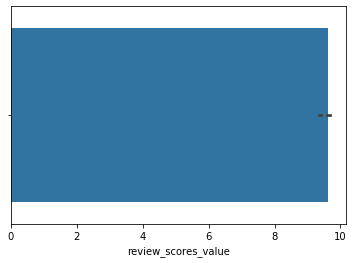

In [18]:


sns.barplot(berlin_review.loc[(berlin_review['host_is_superhost']=='f'), 
            'review_scores_value'], color='r', Label='Host is not superhost') 
  
sns.barplot(berlin_review.loc[(berlin_review['host_is_superhost']=='t'),  
            'review_scores_value'], Label='Host is  superhost')

In [19]:

    
berlin_review=berlin_review[(berlin_review['review_scores_accuracy']<=10)]
    

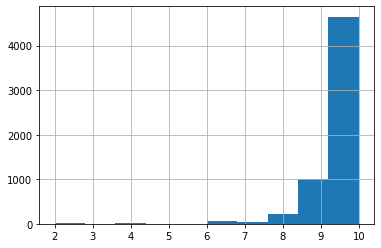

In [20]:
berlin_review['review_scores_accuracy'].hist()

In [1]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(berlin_review.columns[berlin_review.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    berlin_review[var_name].hist(bins=10,color="")
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

NameError: name 'berlin_review' is not defined

## 5] is worth being a super host?

##### Super host type by count.

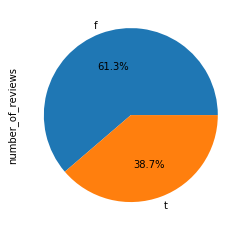

In [22]:
pie_data = Berlin_fill.groupby("host_is_superhost")["number_of_reviews"].sum()
pie_data
pie_data.plot.pie(autopct="%.1f%%");

##### Mean price by superhost.

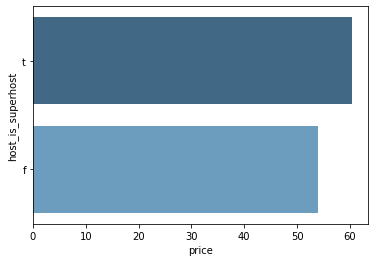

In [23]:
#needs to be modifed by price also

BER_SH = Berlin_fill.groupby('host_is_superhost', as_index=False).price.mean()
BER_SH=BER_SH.sort_values(by='price', ascending=False)
sns.barplot(x='price', y='host_is_superhost', data=BER_SH,palette="Blues_d")